# **Random Forest Regression**
- Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.
- As the name suggests, Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, it predicts the final output.
- The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.

**Assumptions for Random Forest**

Since the random forest combines multiple trees to predict the class of the dataset, it is possible that some decision trees may predict the correct output, while others may not. But together, all the trees predict the correct output. Therefore, below are two assumptions for a better Random forest classifier:
- There should be some actual values in the feature variable of the dataset so that the classifier can predict accurate results rather than a guessed result.
- The predictions from each tree must have very low correlations.

**Why use Random Forest?**

Below are some points that explain why we should use the Random Forest algorithm:
- It takes less training time as compared to other algorithms.
- It predicts output with high accuracy, even for the large dataset it runs efficiently.
- It can also maintain accuracy when a large proportion of data is missing.


**1 Dependent variable** 

In [1317]:
import pandas as pd

In [1318]:
data=pd.read_excel("linear_regression\salary_data.xlsx")
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [1319]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [1320]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [1321]:
import matplotlib.pyplot as plt

(array([5., 5., 7., 3., 2., 4., 4.]),
 array([ 1.1       ,  2.44285714,  3.78571429,  5.12857143,  6.47142857,
         7.81428571,  9.15714286, 10.5       ]),
 <BarContainer object of 7 artists>)

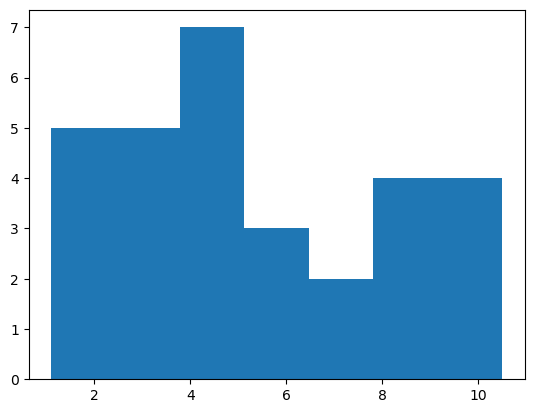

In [1322]:
plt.hist(data.YearsExperience,bins=7)

(array([5., 8., 4., 2., 2., 4., 5.]),
 array([ 37731.        ,  49825.28571429,  61919.57142857,  74013.85714286,
         86108.14285714,  98202.42857143, 110296.71428571, 122391.        ]),
 <BarContainer object of 7 artists>)

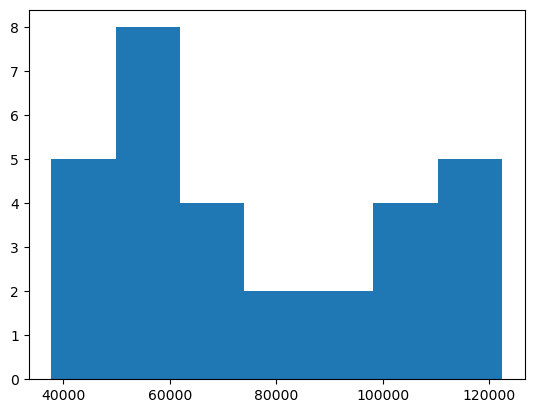

In [1323]:
plt.hist(data.Salary,bins=7)

<Axes: xlabel='YearsExperience', ylabel='Salary'>

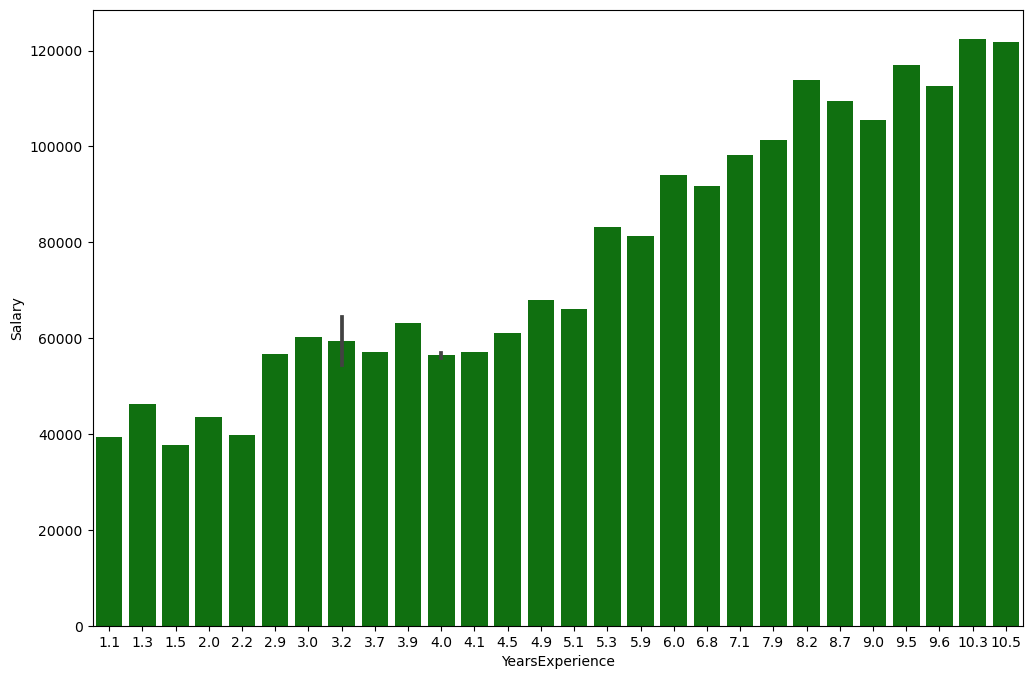

In [1324]:
import seaborn as sns
plt.figure(figsize=[12,8])
sns.barplot(data = data, x = 'YearsExperience', y = 'Salary',color="green")

In [1325]:
x=data.iloc[:,0:1]
y=data.iloc[:,1:2]

In [1326]:
from sklearn.impute import SimpleImputer
impute=SimpleImputer(strategy="mean")
impute.fit(x)
x=impute.transform(x)
x.shape

(30, 1)

In [1327]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=5,criterion="squared_error")
rfr.fit(x,y)

C:\Users\S\AppData\Local\Temp\ipykernel_10588\3685235768.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(x,y)


RandomForestRegressor(n_estimators=5)

In [1328]:
y.shape

(30, 1)

In [1329]:
rfr.predict([[2.5],[3.9],[4.8],[5.7]])

array([49941.6 , 59042.72, 67174.4 , 83878.4 ])

In [1330]:
rfr.score(x,y)

0.990698761429987

In [1331]:
rfr.feature_importances_

array([1.])

**Banglore dataset** 

In [1332]:
df=pd.read_csv("multiple_linear_regression\cleaned_bengluru_house_data.csv")
df.head()

,location,total_sqft,bath,price,bhk
0,Devarachikkanahalli,1250.0,2.0,40.0,2
1,Devarachikkanahalli,1200.0,2.0,83.0,2
2,Devarachikkanahalli,1170.0,2.0,40.0,2
3,Devarachikkanahalli,1425.0,2.0,65.0,3
4,Devarachikkanahalli,947.0,2.0,43.0,2


In [1333]:
column_name=list(df.columns)
column_to_move="bhk"
column_name.insert(1,column_name.pop(column_name.index(column_to_move)))
df=df[column_name]

In [1334]:
df.head()

,location,bhk,total_sqft,bath,price
0,Devarachikkanahalli,2,1250.0,2.0,40.0
1,Devarachikkanahalli,2,1200.0,2.0,83.0
2,Devarachikkanahalli,2,1170.0,2.0,40.0
3,Devarachikkanahalli,3,1425.0,2.0,65.0
4,Devarachikkanahalli,2,947.0,2.0,43.0


In [1335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7172 non-null   object 
 1   bhk         7172 non-null   int64  
 2   total_sqft  7172 non-null   float64
 3   bath        7172 non-null   float64
 4   price       7172 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 280.3+ KB


In [1336]:
df.describe()

,bhk,total_sqft,bath,price
count,7172.000000,7172.000000,7172.000000,7172.000000
mean,2.486615,1493.736643,2.436977,98.370352
std,0.903958,850.380345,0.991845,92.459976
min,1.000000,350.000000,1.000000,10.000000
25%,2.000000,1100.000000,2.000000,50.000000
50%,2.000000,1260.000000,2.000000,73.000000
75%,3.000000,1677.750000,3.000000,110.000000
max,16.000000,30000.000000,16.000000,2200.000000


In [1337]:
x=df.iloc[:,0:4]
y=df.iloc[:,4:5]

In [1338]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
ct=ColumnTransformer(
    [
        ("One hot encoding",OneHotEncoder(),[0]),
        ("Standard Scaler",StandardScaler(),[1,2,3])
    ],
    remainder="passthrough",
)
x=ct.fit_transform(x)

In [1339]:
x.shape

(7172, 245)

In [1340]:
x=x[:,1:]
x.shape

(7172, 244)

In [1341]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [1342]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((5379, 244), (1793, 244), (5379, 1), (1793, 1))

In [1343]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
mlr=LinearRegression()

In [1344]:
mlr.fit(x_train,y_train)

LinearRegression()

In [1345]:
mlr.score(x_train,y_train)

0.8512244212041873

In [1346]:
mlr_predict=mlr.predict(x_test)

In [1347]:
from sklearn.metrics import r2_score
r2_score(y_test,mlr_predict)

0.8595738371269906

In [1348]:
mlr.score(x_test,y_test)

0.8595738371269906

In [1349]:
rfr1=RandomForestRegressor(n_estimators=5,criterion="squared_error")

In [1350]:
df.head()

,location,bhk,total_sqft,bath,price
0,Devarachikkanahalli,2,1250.0,2.0,40.0
1,Devarachikkanahalli,2,1200.0,2.0,83.0
2,Devarachikkanahalli,2,1170.0,2.0,40.0
3,Devarachikkanahalli,3,1425.0,2.0,65.0
4,Devarachikkanahalli,2,947.0,2.0,43.0


In [1351]:
rf_X=df.iloc[:,0:4]
rf_y=df.iloc[:,4:5]

In [1352]:
ct1=ColumnTransformer(
    [
        ("One hot encoding",OneHotEncoder(),[0]),
    ],
    remainder="passthrough",
)
rf_X=ct1.fit_transform(rf_X)

In [1353]:
rf_X.shape

(7172, 245)

In [1354]:
rf_X=rf_X[:,1:]
rf_X.shape

(7172, 244)

In [1355]:
rf_y.shape

(7172, 1)

In [1356]:
rfx_train,rfx_test,rfy_train,rfy_test=train_test_split(rf_X,rf_y,test_size=0.25)

In [1357]:
rfr1.fit(rfx_train,rfy_train.values.flatten())

RandomForestRegressor(n_estimators=5)

In [1358]:
rfy_pred=rfr1.predict(rfx_test)

In [1359]:
rfr1.score(rfx_train,rfy_train)

0.9525677239200979

In [1360]:
rfr1.score(rfx_test,rfy_test)

0.8382659267041795

In [1361]:
rfr1.feature_importances_

array([1.88855702e-03, 7.36352210e-04, 2.92249514e-05, 1.03259377e-03,
       8.29421290e-08, 3.47656354e-04, 2.63154424e-04, 3.93343608e-04,
       2.34617957e-04, 3.15192722e-05, 9.11892546e-06, 3.99649721e-05,
       1.48889257e-04, 8.92330937e-06, 3.08781036e-05, 1.61968762e-05,
       1.78423617e-05, 1.10373075e-04, 1.77180999e-04, 1.66169861e-04,
       1.00489111e-04, 2.41543349e-05, 3.14607609e-04, 5.57013842e-05,
       1.58106641e-03, 1.75324040e-05, 4.29747450e-05, 1.19082084e-05,
       9.96437070e-05, 6.97750663e-05, 2.43961192e-03, 5.33958264e-05,
       1.75143140e-04, 2.86509060e-06, 1.13471300e-05, 3.83942536e-06,
       7.70911287e-05, 1.80714704e-04, 6.88190057e-04, 9.16758256e-04,
       1.19581304e-04, 1.15918678e-04, 4.07197751e-04, 5.15322092e-05,
       6.05658257e-03, 8.96955490e-06, 2.47206913e-05, 1.72568125e-05,
       2.23300554e-04, 1.73628291e-05, 1.47009763e-05, 1.04840927e-04,
       7.45867022e-05, 1.86365648e-04, 1.41258511e-04, 5.46895037e-05,
      

In [1362]:
test_data=pd.DataFrame(
   {
   "location":"1st Block Jayanagar",
   "bhk":6,
   "total_sqft":3000.5,
   "bath":8,
  },
   index=[0]
)
test_data

,location,bhk,total_sqft,bath
0,1st Block Jayanagar,6,3000.5,8


In [1363]:
newx=test_data.iloc[:,:]

In [1364]:
newx_ct=ct.transform(newx)

In [1365]:
newx_ct.shape

(1, 245)

In [1366]:
newx_ct=newx_ct[:,1:]

In [1367]:
mlr.predict(newx_ct)

array([[398.14848671]])

In [1368]:
newx_ct1=ct1.transform(test_data)

In [1369]:
newx_ct1.shape

(1, 245)

In [1370]:
newx_ct1=newx_ct1[:,1:]
newx_ct1.shape

(1, 244)

In [1371]:
rfr1.predict(newx_ct1)

array([208.2])